In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
mmiles = pd.read_csv('PHMSA_Cleaned_Data/PHMSA_Main_Mileage_2020.csv',index_col=0)

In [27]:
def return_statewide_mileage(sa):
    mmiles = pd.read_csv('PHMSA_Cleaned_Data/PHMSA_Main_Mileage_2020.csv',index_col=0)
    temp_df = mmiles[mmiles.State==sa].reset_index(drop=True)
    mo = temp_df[temp_df['Operator Type']=='Municipal Owned'].reset_index(drop=True)
    io = temp_df[temp_df['Operator Type']=='Investor Owned'].reset_index(drop=True)
    po = temp_df[temp_df['Operator Type']=='Privately Owned'].reset_index(drop=True)
    co = temp_df[temp_df['Operator Type']=='Cooperative'].reset_index(drop=True)
    dfs = [mo,io,po,co,temp_df]
    dfnames = ['Municipal Owned','Investor Owned','Privately Owned','Cooperative','Total']
    finals = []
    for i in range(5):
        tot = ['Statewide Total','',dfnames[i],sa]
        sums1 = [sum(dfs[i]['Total Main Miles'])]
        try:
            sums2 = [sum(dfs[i]['Main Mileage Average Age'])/len(dfs[i])]
        except:
            sums2 = [0]
        sums3 = [sum(dfs[i]['Main Miles over 50 Years Old'])]
        mt = [int(sum(dfs[i][col])) for col in df.columns[7:]]
        data = tot+sums1+sums2+sums3+mt
        finals.append(data)
    for i in range(5):
        temp_df.loc[len(temp_df.index)] = finals[i]
    temp_df = temp_df.iloc[::-1].reset_index(drop=True)
    return temp_df

In [28]:
sa = return_statewide_mileage('CA')

In [30]:
sa.head(10)

,Operator Name,Operator ID,Operator Type,State,Total Main Miles,Main Mileage Average Age,Main Miles over 50 Years Old,Main Miles Built in Unknown Decade,Main Miles Built Pre-1940,Main Miles Built 1940-49,Main Miles Built 1950-59,Main Miles Built 1960-69,Main Miles Built 1970-79,Main Miles Built 1980-89,Main Miles Built 1990-99,Main Miles Built 2000-09,Main Miles Built 2010-19,Main Miles Built 2020-29
0,Statewide Total,,Total,CA,107898.581,30.526316,45510,394.00,4260.0,6202.0,15821.0,15048.000,14936.000,17506.00,12794.00,13904.000,6605.000,423.000
1,Statewide Total,,Cooperative,CA,0.000,0.000000,0,0.00,0.0,0.0,0.0,0.000,0.000,0.00,0.00,0.000,0.000,0.000
2,Statewide Total,,Privately Owned,CA,3412.272,26.125000,282,123.00,0.0,0.0,149.0,94.000,265.000,480.00,612.00,1084.000,563.000,37.000
3,Statewide Total,,Investor Owned,CA,103178.590,44.750000,44561,256.00,4238.0,6144.0,15362.0,14728.000,14556.000,16955.00,12078.00,12579.000,5894.000,384.000
4,Statewide Total,,Municipal Owned,CA,1307.719,27.428571,667,14.00,22.0,57.0,309.0,225.000,115.000,70.00,103.00,240.000,147.000,1.000
5,CITY OF VICTORVILLE,32119,Municipal Owned,CA,11.150,8.000000,0,1.13,0.0,0.0,0.0,0.000,0.000,0.00,0.00,2.260,7.760,0.000
6,AMERIGAS PROPANE LP,32013,Privately Owned,CA,65.900,25.000000,6,2.50,0.0,0.0,0.0,5.450,7.090,4.62,8.87,34.200,3.170,0.000
7,KAMPS PROPANE,31964,Privately Owned,CA,6.190,44.000000,1,0.00,0.0,0.0,0.0,0.715,3.415,2.13,0.00,0.000,0.000,0.000
8,CITY OF VERNON,31955,Municipal Owned,CA,44.286,21.000000,0,0.00,0.0,0.0,0.0,0.000,0.000,0.00,25.00,19.041,0.144,0.101
9,CITY OF SUSANVILLE,31599,Municipal Owned,CA,60.000,15.000000,0,0.00,0.0,0.0,0.0,0.000,0.000,0.00,0.00,59.000,1.000,0.000


In [51]:
def Cumulative(lists):
    cu_list = []
    length = len(lists)
    cu_list = [sum(lists[0:x:1]) for x in range(0, length+1)]
    return cu_list[1:]

In [55]:
miles = list(sa.iloc[0,8:])
unk = sa.iloc[0,7]/len(miles)
miles = [i+unk for i in miles]
miles

[52.2, 3.2, 30.2, 250.2, 132.2, 357.2, 434.2, 390.2, 355.2, 26.2]

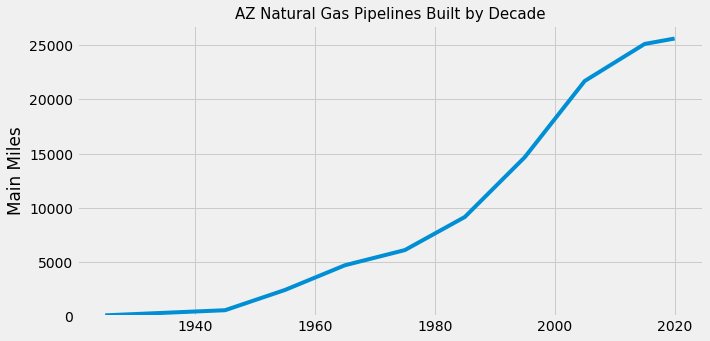

In [59]:
s = 'AZ'
sa = return_statewide_mileage(s)
plt.figure(figsize = (10,5))
plt.style.use('fivethirtyeight')
miles = list(sa.iloc[0,8:])
unk = sa.iloc[0,7]/len(miles)
miles = [i+unk for i in miles]
miles = Cumulative(miles)
plt.plot([1925,1945,1955,1965,1975,1985,1995,2005,2015,2020], miles)
plt.ylabel('Main Miles')
plt.ylim(0,)
plt.title(s + ' Natural Gas Pipelines Built by Decade', fontsize=15)
plt.show()

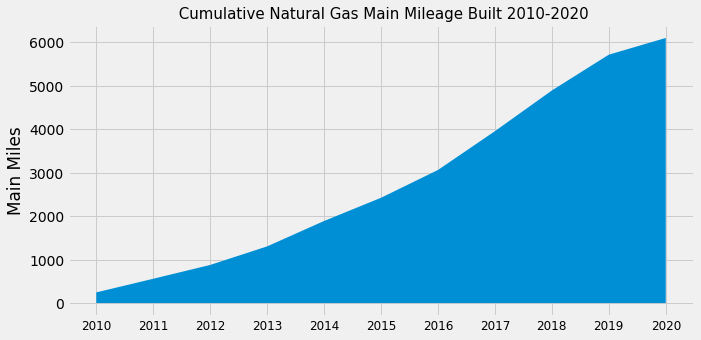

In [24]:
plt.figure(figsize = (10,5))
plt.style.use('fivethirtyeight')
plt.stackplot(list(range(2010,2021)), miles, labels=['Main Miles'])
plt.ylabel('Main Miles')
plt.xticks((np.arange(2010, 2021, step=1)), fontsize=12)
plt.title(' Cumulative Natural Gas Main Mileage Built 2010-2020', fontsize=15)
plt.show()

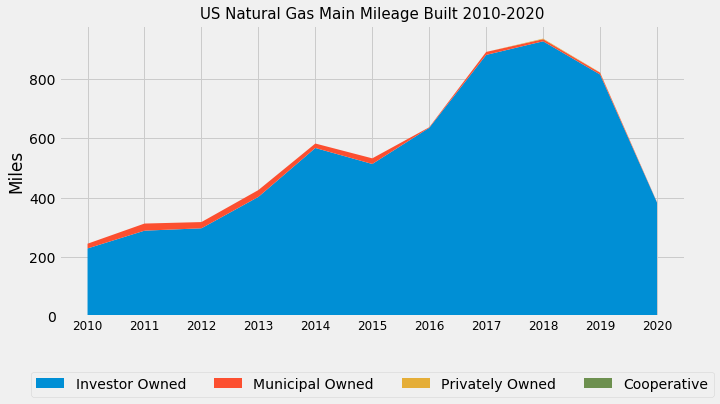

In [12]:
plt.figure(figsize = (10,5))
plt.style.use('fivethirtyeight')
co_sum = list(miles10a.iloc[1,4:])
po_sum = list(miles10a.iloc[2,4:])
io_sum = list(miles10a.iloc[3,4:])
mo_sum = list(miles10a.iloc[4,4:])
plt.stackplot(list(range(2010,2021)), io_sum, mo_sum, po_sum, co_sum, labels=['Investor Owned','Municipal Owned','Privately Owned','Cooperative'])
#plt.ylim(0,max_val*1.1)
plt.ylabel('Miles')
#plt.yticks(np.arange(0,max_val*1.1, step=5000), fontsize=12)
plt.xticks((np.arange(2010, 2021, step=1)), fontsize=12)
plt.title('US Natural Gas Main Mileage Built 2010-2020', fontsize=15)
plt.legend(loc='lower center',fontsize=14, ncol=4, bbox_to_anchor=(0.5, -0.3))
plt.show()